In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows', None)

In [3]:
data = pd.read_csv('loan.csv')
df = data.copy()
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(887379, 74)

### Checking the Target Column

In [5]:
df['loan_status'].value_counts()

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

### Imputing the Target Column
    Current                                                - Current
    Fully Paid                                             - Fully Paid
    Charged Off                                            - Charged Off
    Late (31-120 days)                                     - Default
    Issued                                                 - Current
    In Grace Period                                        - Current
    Late (16-30 days)                                      - Default
    Does not meet the credit policy. Status : Fully Paid   - Fully Paid
    Default                                                - Default
    Does not meet the credit policy. Status : Charged Off  - Charged Off

In [6]:
df['loan_status'].replace({'Issued' : 'Current', 'In Grace Period' : 'Current', 'Does not meet the credit policy. Status:Fully Paid' : 'Fully Paid', 'Does not meet the credit policy. Status:Charged Off' : 'Charged Off', 'Late (31-120 days)' : 'Default', 'Late (16-30 days)' : 'Default'}, inplace = True)

In [7]:
df['loan_status'].value_counts()

Current        616492
Fully Paid     209711
Charged Off     46009
Default         15167
Name: loan_status, dtype: int64

We are taking only the loan status which are Fully Paid, Charged Off and Default as the current loan status refers to accounts which are in the process of being repaid. While our business problem is regarding loan approval for which we can only use historical loan data for which the loans have been Fully Repaid or Charged Off or Default.

In [8]:
df_v1 = df[df['loan_status'] != 'Current']

In [9]:
df_v1['loan_status'].value_counts()

Fully Paid     209711
Charged Off     46009
Default         15167
Name: loan_status, dtype: int64

### Further imputing the Target Column
    Fully Paid  - Loan Accepted
    Charged Off - Loan Rejected
    Default     - Loan Rejected

In [10]:
df_v1['loan_status'].replace({'Fully Paid' : 'Loan Accepted', 'Charged Off' : 'Loan Rejected', 'Default' : 'Loan Rejected'}, inplace = True)

In [11]:
df_v1['loan_status'].value_counts()

Loan Accepted    209711
Loan Rejected     61176
Name: loan_status, dtype: int64

### Checking Null Values


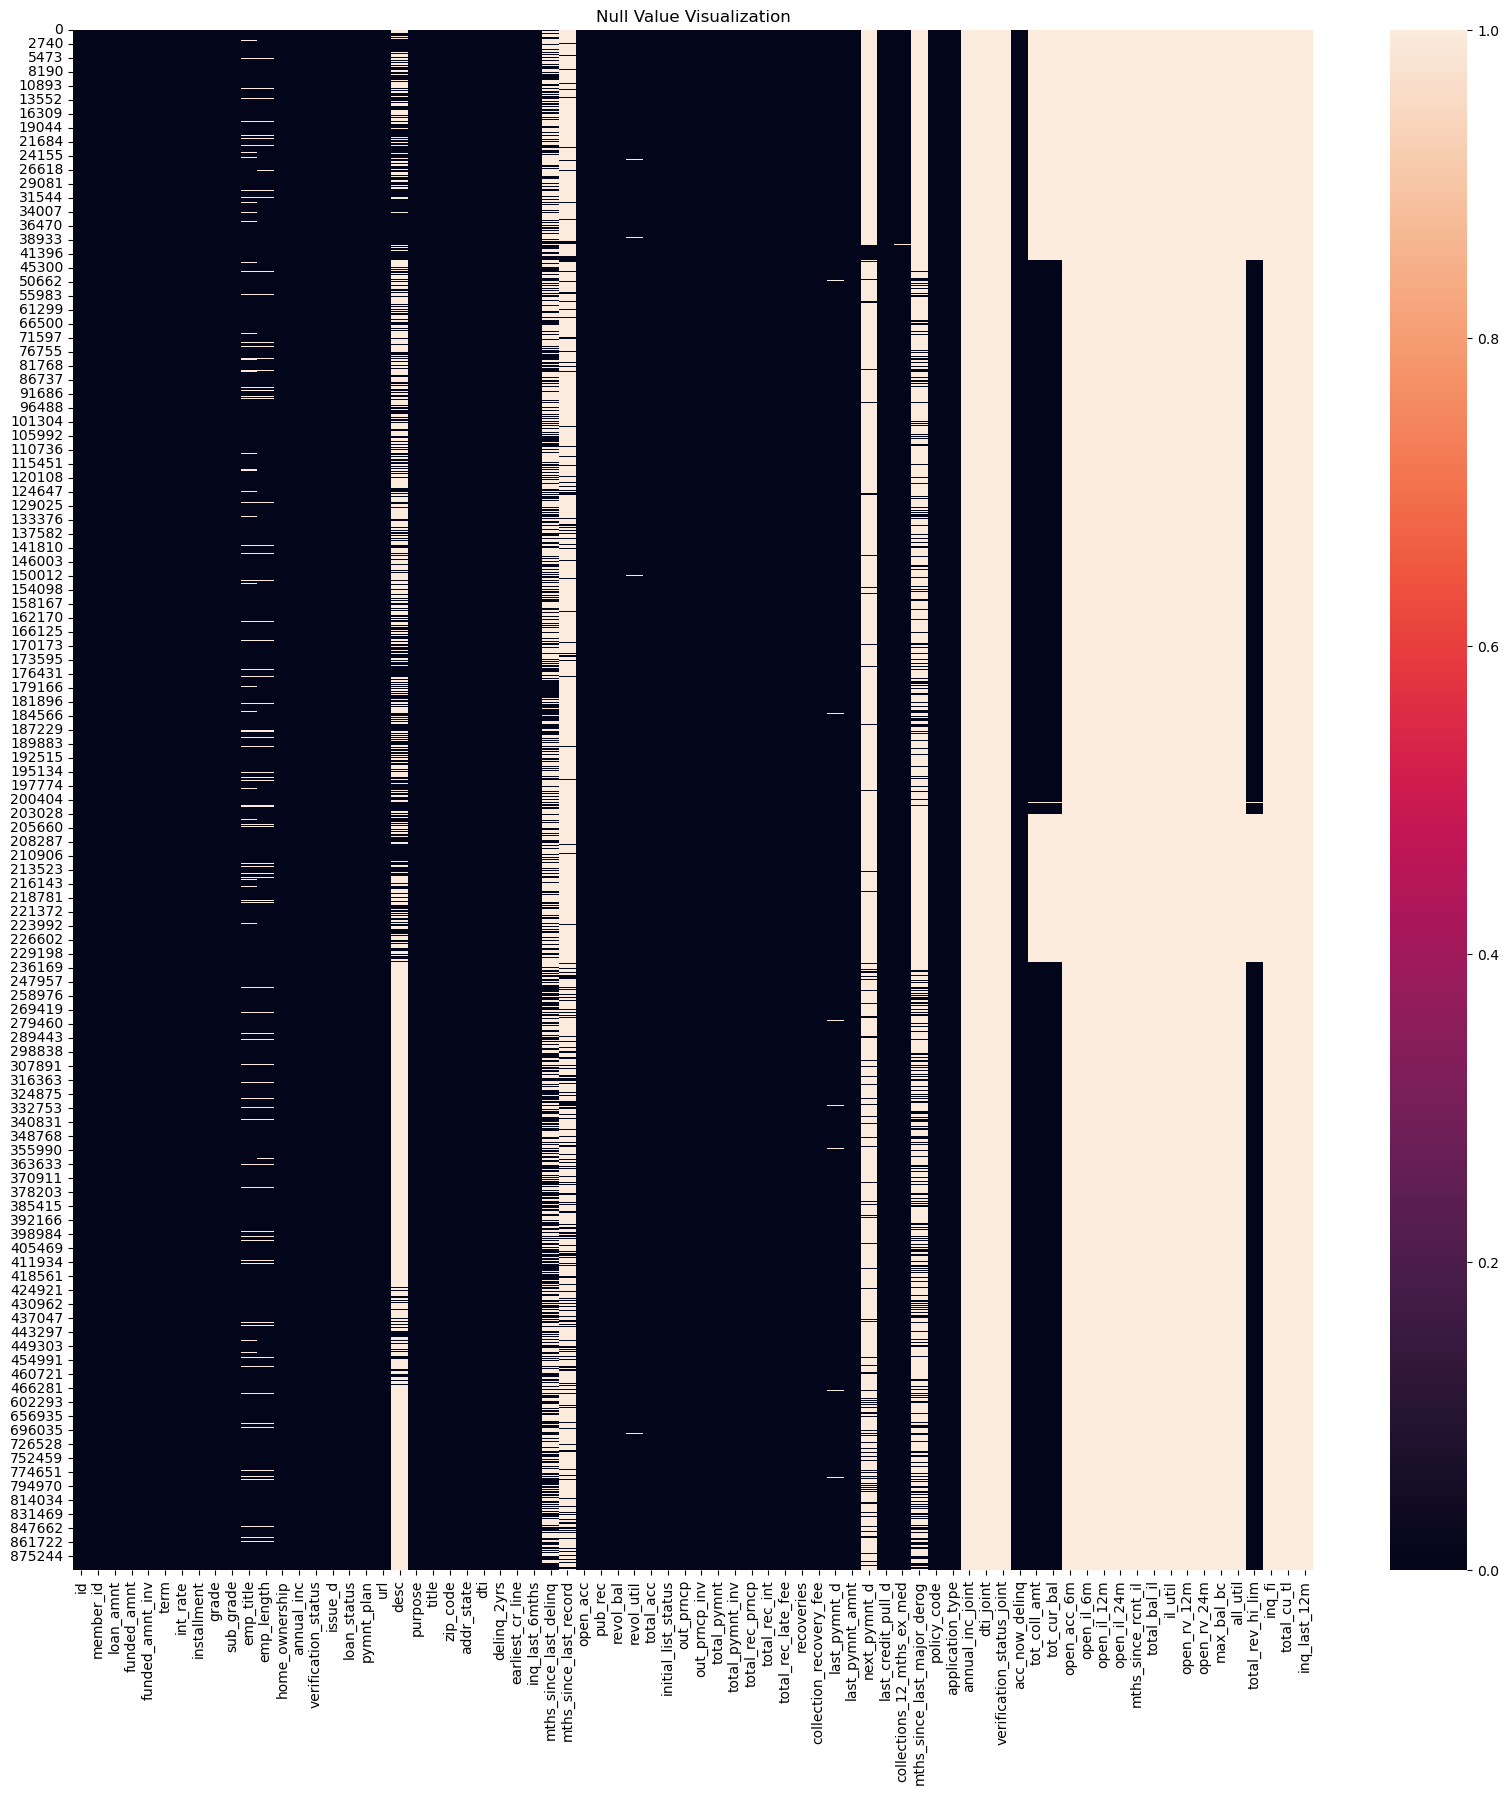

In [12]:
plt.figure(figsize = (20,20))
sns.heatmap(df_v1.isna())
plt.title('Null Value Visualization')
plt.show()

In [13]:
df_na = pd.DataFrame({'NA_Values' : df_v1.isna().sum(), 'Percent_NA' : round((df_v1.isna().sum()/len(df_v1))*100)})

In [14]:
df_na[df_na['Percent_NA'] > 50]

,NA_Values,Percent_NA
desc,178739,66.0
mths_since_last_delinq,149189,55.0
mths_since_last_record,235810,87.0
next_pymnt_d,252971,93.0
mths_since_last_major_derog,218906,81.0
annual_inc_joint,270884,100.0
dti_joint,270884,100.0
verification_status_joint,270884,100.0
open_acc_6m,270743,100.0
open_il_6m,270743,100.0


### Dropping the above columns as they have more than 50% Null Values.

In [15]:
df_v1.shape

(270887, 74)

In [16]:
df_v1.drop(columns = ['desc', 'mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m'], inplace = True)

In [17]:
df_v1.shape

(270887, 52)

### Checking the application types

In [18]:
df_v1['application_type'].value_counts()

INDIVIDUAL    270884
JOINT              3
Name: application_type, dtype: int64

### Dropping the joint accounts as there are only 3 of them.

In [19]:
joint = df_v1[df_v1['application_type'] == 'JOINT']
df_v1.drop(index = joint.index, axis = 0, inplace = True)

In [20]:
df_v1.shape

(270884, 52)

### Dropping the Application Type Column as there are only Individual Accounts now.

In [21]:
df_v1.drop(columns = 'application_type', inplace = True)

In [22]:
df_v1.shape

(270884, 51)

In [23]:
df_na[(df_na['NA_Values'] < 1000) & (df_na['NA_Values'] != 0)]

,NA_Values,Percent_NA
annual_inc,4,0.0
title,15,0.0
delinq_2yrs,29,0.0
earliest_cr_line,29,0.0
inq_last_6mths,29,0.0
open_acc,29,0.0
pub_rec,29,0.0
revol_util,251,0.0
total_acc,29,0.0
last_pymnt_d,709,0.0


### Dropping the above Null Values as they contribute to less than 1% of the Data.

In [24]:
df_v1.dropna(subset = ['annual_inc', 'title', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_util', 'total_acc', 'last_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'acc_now_delinq'], inplace = True)

In [25]:
df_na[(df_na['NA_Values'] > 1000) & (df_na['Percent_NA'] < 50)]

,NA_Values,Percent_NA
emp_title,15120,6.0
emp_length,10863,4.0
tot_coll_amt,66623,25.0
tot_cur_bal,66623,25.0
total_rev_hi_lim,66623,25.0


### Dropping the total_rev_hi_lim as it is a column which doesnt help in the prediction of the target variable.

In [26]:
df_v1.shape

(269781, 51)

In [27]:
df_v1.drop(columns = 'total_rev_hi_lim', inplace = True)

In [28]:
df_v1.shape

(269781, 50)

### Filling the Null values in the tot_coll_amt with 0.

In [29]:
df_v1['tot_coll_amt'].fillna(0, inplace = True)

In [30]:
df_v1['tot_coll_amt'].isna().sum()

0

### Filling the Null Values in the tot_cur_bal with the 0.

In [31]:
df_v1['tot_cur_bal'].fillna(0, inplace = True)

In [32]:
df_v1['tot_cur_bal'].isna().sum()

0

### Filling the Null values in the emp_title & emp_length column with Unknown

In [33]:
df_v1['emp_title'].replace(to_replace = np.nan, value = 'Unknown', inplace = True)

In [34]:
df_v1['emp_title'].isna().sum()

0

In [35]:
df_v1['emp_length'].replace(to_replace = np.nan, value = 'Unknown', inplace = True)

In [36]:
df_v1['emp_length'].isna().sum()

0

### Dropping Unnecessary Columns

In [37]:
df_v1.drop(columns = ['id', 'member_id', 'url', 'zip_code', 'addr_state', 'issue_d', 'purpose', 'title', 'emp_title', 'pub_rec', 'revol_bal', 'revol_util', 'last_pymnt_d', 'policy_code', 'earliest_cr_line', 'last_pymnt_amnt', 'last_credit_pull_d'], inplace = True)

In [38]:
df_v1.shape

(269781, 33)

### Dropping pymnt_plan

In [39]:
df_v1['pymnt_plan'].value_counts()

n    269774
y         7
Name: pymnt_plan, dtype: int64

In [40]:
joint = df_v1[df_v1['pymnt_plan'] == 'y']
df_v1.drop(index = joint.index, axis = 0, inplace = True)

In [43]:
df_v1.drop(columns = 'pymnt_plan', inplace = True)

In [44]:
df_v1.shape

(269774, 32)

In [45]:
df_v1.to_csv('Null Value Treated Data', index = False)